In [145]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [146]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
import pandas as pd
import xarray as xr
import Nio
print (Nio.__version__)
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import signal
%matplotlib inline

print("python version:")
import platform
print(platform.python_version())

1.5.5
python version:
3.7.3


In [147]:
sstdat = xr.open_dataset('http://apdrc.soest.hawaii.edu/dods/public_data/NOAA_SST/ERSST/monthly_v5')
#sstdat
sst = sstdat['sst']
sst

#note: lat & lon go by scale of 2 degrees

<xarray.DataArray 'sst' (time: 2004, lat: 89, lon: 180)>
[32104080 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-12-01
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  extended reconstructed sea surface temperature [degree c] 

In [157]:
slpdat = xr.open_dataset('slp.mnmean.real.nc')
#slpdat
slp = slpdat['slp']
slp



#note: lat & lon go by scale of 5 degrees

<xarray.DataArray 'slp' (time: 2029, lat: 37, lon: 72)>
[5405256 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 85.0 80.0 75.0 70.0 ... -75.0 -80.0 -85.0 -90.0
  * lon      (lon) float32 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2019-01-01
Attributes:
    long_name:             Monthly Mean Sea Level Pressure
    unpacked_valid_range:  [ 850. 1400.]
    actual_range:          [ 953.9066 1052.5088]
    units:                 mb
    precision:             1
    var_desc:              Sea Level Pressure
    dataset:               HadSLP2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Individual Observation
    valid_range:           [-32765  32765]

In [158]:
precipdat = xr.open_dataset('data/pALLIN_1900:1988_1900:1988.nc', decode_times=False)
precipdat
time = pd.date_range('1900-01-01', freq='M', periods=1068)
precip = xr.Dataset({'data': ('data', precipdat['precip']), 'time': time, 'foo': ('int', np.arange(1068))})
precip

<xarray.Dataset>
Dimensions:  (data: 1068, int: 1068, time: 1068)
Coordinates:
  * data     (data) float32 15.3 6.7 10.3 38.5 40.6 ... 205.6 50.2 22.5 10.2
  * time     (time) datetime64[ns] 1900-01-31 1900-02-28 ... 1988-12-31
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1061 1062 1063 1064 1065 1066 1067

In [159]:
precipdatpALLIN = xr.open_dataset('pALLIN.nc', decode_times=False)
precipdatpALLIN
time = pd.date_range('1874-05-01', freq='M', periods=1752)
precipALLIN = xr.Dataset({'data': ('data', precipdatpALLIN['precip']), 'time': time, 'foo': ('int', np.arange(1752))})
precipALLIN

<xarray.Dataset>
Dimensions:  (data: 1752, int: 1752, time: 1752)
Coordinates:
  * data     (data) float32 19.6 10.7 14.5 33.9 63.6 ... 168.7 52.1 8.0 7.0
  * time     (time) datetime64[ns] 1874-05-31 1874-06-30 ... 2020-04-30
Dimensions without coordinates: int
Data variables:
    foo      (int) int64 0 1 2 3 4 5 6 7 ... 1745 1746 1747 1748 1749 1750 1751

In [160]:
year = []
jan = []
feb = []
mar = []
apr = []
may = []
jun = []
jul = []
aug = []
sept = []
octo = []
nov = []
dec = []

with open('8-all_ind.txt') as f:
    for line in f:
        data = line.split()
        year.append(int(data[0]))
        jan.append(float(data[1]))
        feb.append(float(data[2]))
        mar.append(float(data[3]))
        apr.append(float(data[4]))
        may.append(float(data[5]))
        jun.append(float(data[6]))
        jul.append(float(data[7]))
        aug.append(float(data[8]))
        sept.append(float(data[9]))
        octo.append(float(data[10]))
        nov.append(float(data[11]))
        dec.append(float(data[12]))
rainfall = []
for x in range(194):
    precipSum = jun[x] + jul[x] + aug[x] + sept[x]
    rainfall.append(float(precipSum))
    #rainfall.append(float(jan[x]))
print(rainfall)

[840.5, 837.4000000000001, 895.3999999999999, 894.1999999999999, 976.4000000000001, 1036.2, 864.9000000000001, 912.2, 887.4000000000001, 960.4, 795.5, 770.2, 920.9, 978.7, 977.2, 891.4, 817.4000000000001, 779.1, 962.3, 775.1, 819.3000000000001, 882.7, 954.1, 848.3999999999999, 804.7, 697.5, 882.7, 773.8, 902.2, 931.1, 807.8, 787.6999999999999, 847.4, 939.0, 847.2, 688.0, 798.2, 863.5, 744.0, 880.6999999999999, 800.3, 936.3, 745.3999999999999, 899.6, 830.6, 813.5, 912.8000000000001, 733.0999999999999, 1051.2, 966.1000000000001, 941.2, 747.6, 821.0999999999999, 847.9, 962.9, 777.3000000000001, 862.4, 972.5, 959.9, 969.1000000000001, 819.5000000000001, 1033.2, 996.8999999999999, 830.5999999999999, 609.4000000000001, 1039.8, 974.7, 863.7, 901.1, 962.5, 868.8, 967.1, 926.5, 935.2, 960.1, 903.9000000000001, 990.1, 985.9, 843.1, 1050.2, 991.9999999999999, 1031.9, 856.7, 842.4000000000001, 960.2, 942.8, 694.6, 952.8, 771.6, 857.1, 896.0, 813.0999999999999, 747.9, 946.1, 804.9000000000001, 931.

In [161]:
#constants
finalyear = 119
startingyear = 0

maySST1

In [171]:
#EP-ENSOpredictor

'''set #1'''
latrange1 = sst.sel(lat = slice(-20, 5)).lat
weights1 = np.cos(latrange1*np.pi/180)

marchdata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==3))
marchSST1 = marchdata1.sel(time = slice('1900-03-01', '2018-03-01'))

marchmean1 = (marchSST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#marchmean1

marchcalculation1 = (marchdata1.sel(time = slice('1900-03-01', '2018-03-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = sst.sel(lat = slice(-20, 5), lon = slice(150, 170), time = (sst['time.month']==5))
maySST1 = maydata1.sel(time = slice('1900-05-01', '2018-05-01'))

maymean1 = (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = (maydata1.sel(time = slice('1900-05-01', '2018-05-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

marchmean1.time.data = maymean1.time.data
marchcalculation1.time.data = maycalculation1.time.data

DSST1 = maymean1 - marchmean1
#DSST1

DSSTcalculation1 = maycalculation1 - marchcalculation1

'''set #2'''
latrange2 = sst.sel(lat = slice(-10, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

marchdata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==3))
marchSST2 = marchdata2.sel(time = slice('1900-03-01', '2018-03-01'))

marchmean2 = (marchSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#marchmean2

marchcalculation2 = (marchdata2.sel(time = slice('1900-03-01', '2018-03-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = sst.sel(lat = slice(-10, 10), lon = slice(250, 280), time = (sst['time.month']==5))
maySST2 = maydata2.sel(time = slice('1900-05-01', '2018-05-01'))

maymean2 = (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = (maydata2.sel(time = slice('1900-05-01', '2018-05-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

marchmean2.time.data = maymean2.time.data
marchcalculation2.time.data = maycalculation2.time.data

DSST2 = (maymean2 - marchmean2)
#DSST2

DSSTcalculation2 = maycalculation2 - marchcalculation2

EPT = DSST1 - DSST2
print (EPT)

EPTcalculation = DSSTcalculation1 - DSSTcalculation2
print (EPTcalculation)

<xarray.DataArray (time: 119)>
array([-0.106976, -0.251422, -1.241294,  0.465158, -1.274338, -0.671393,
        1.274047, -0.189429,  0.528859, -0.089656,  0.147374, -1.059527,
        0.824667,  0.150025,  0.081377, -0.517326,  0.272274, -0.42827 ,
       -0.51721 , -0.281727,  0.653641, -0.359796,  0.081853, -0.480328,
        0.090991,  0.007025,  0.051119, -0.142069, -0.092793, -0.492864,
       -0.52233 ,  0.776279, -1.043112,  0.165787,  0.028621, -0.900746,
       -0.085271,  0.255577,  0.451604, -0.848844, -0.346591, -0.163078,
        1.110234, -0.314664,  0.009127, -0.449154, -0.093069,  0.912869,
        1.134274, -0.336539,  0.098147, -0.332115,  0.644082, -0.29495 ,
        0.966212,  0.230685,  0.715894, -0.624445, -0.318119,  0.709384,
        0.509534,  0.216731, -0.150298, -0.065253,  1.073105, -0.991001,
       -0.034543, -0.251549, -0.198961, -0.488072,  0.00334 , -0.066313,
       -0.905693,  0.526287, -0.49546 ,  0.482486, -0.534162,  0.266194,
        0.336988, -0

In [172]:
EPT = (DSST1 - DSST2)
#EPTstd = 0.546494
'''
EPTstd = EPT.std() #.543314
EPTmean = EPT.mean()
print(EPTstd)
EPTdetrend = signal.detrend(EPT)
EPT = EPT - EPTmean
EPT = EPT / EPTstd
EPT = EPT - EPTdetrend
'''
EPTdetrend = signal.detrend(EPT)
EPTstd = EPTdetrend.std()
print(EPTstd)
EPTmean = EPTdetrend.mean()
EPT = (EPTdetrend - EPTmean)/EPTstd
#EPTtrain = EPT.sel(time = slice('1900-05-01', '2018-05-01'))
EPT

0.5430218659171054


array([-0.05501997, -0.32197852, -2.14582862,  0.99572774, -2.2085902 ,
       -1.09919363,  2.48247015, -0.21354383,  1.10826263, -0.03171633,
        0.4038313 , -1.81968852,  1.6491882 ,  0.40584879,  0.27847574,
       -0.8250173 ,  0.62811277, -0.66292708, -0.82766894, -0.39497001,
        1.32659824, -0.54064697,  0.27171606, -0.76452116,  0.28663477,
        0.13105242,  0.21129847, -0.14542121, -0.05563043, -0.79333588,
       -0.84855358,  1.54194159, -1.80950629,  0.41578337,  0.16223153,
       -1.55019642, -0.04941581,  0.57731665,  0.93735419, -1.45843532,
       -0.53446788, -0.1974748 ,  2.14643425, -0.4785366 ,  0.11678476,
       -0.72811544, -0.07332341,  1.77820448,  2.18497648, -0.52454891,
        0.27499205, -0.51830961,  1.2784469 , -0.45177919,  1.86975569,
        0.51429324,  1.40687449, -1.06237811, -0.49921806,  1.39202145,
        1.02303341,  0.48286842, -0.19398716, -0.03832709,  2.05705712,
       -1.74504499,  0.01536283, -0.38521843, -0.28932941, -0.82

In [173]:
#CP-ENSOpredictor

'''set #1'''
latrange1= sst.sel(lat = slice(-25, -10)).lat
weights1= np.cos(latrange1*np.pi/180)

aprildata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==4))
aprilSST1= aprildata1.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean1= (aprilSST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#aprilmean1

aprilcalculation1 = (aprildata1.sel(time = slice('1900-04-01', '2018-04-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1= sst.sel(lat = slice(-25, -10), lon = slice(170, 200), time = (sst['time.month']==5))
maySST1= maydata1.sel(time = slice('1900-05-01', '2018-05-01'))

maymean1= (maySST1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = (maydata1.sel(time = slice('1900-05-01', '2018-05-01'))*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
aprilcalculation1.time.data = maycalculation1.time.data

DSST1 = maymean1 - aprilmean1
#DSST1

DSSTcalculation1 = maycalculation1 - aprilcalculation1

'''set #2'''
latrange2= sst.sel(lat = slice(5, 20)).lat
weights2= np.cos(latrange2*np.pi/180)

aprildata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==4))
aprilSST2= aprildata2.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean2= (aprilSST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#aprilmean2

aprilcalculation2 = (aprildata2.sel(time = slice('1900-04-01', '2018-04-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2= sst.sel(lat = slice(5, 20), lon = slice(180, 210), time = (sst['time.month']==5))
maySST2= maydata2.sel(time = slice('1900-05-01', '2018-05-01'))

maymean2= (maySST2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = (maydata2.sel(time = slice('1900-05-01', '2018-05-01'))*weights2).mean({'lon', 'lat'})/weights2.mean()

aprilmean2.time.data = maymean2.time.data
aprilcalculation2.time.data = maycalculation2.time.data

DSST2 = maymean2 - aprilmean2
#DSST2

DSSTcalculation2 = maycalculation2 - aprilcalculation2

CPT = DSST1 - DSST2
print (CPT)

CPTcalculation = DSSTcalculation1 - DSSTcalculation2

print (CPT.mean())
print (CPTcalculation.mean())

<xarray.DataArray (time: 119)>
array([-0.849155, -1.486921, -1.143121, -1.033298, -1.45798 , -1.585492,
       -1.02882 , -0.840201, -0.97147 , -0.743902, -1.77659 , -1.124135,
       -1.023065, -0.717028, -1.16801 , -1.187914, -1.101848, -0.608028,
       -1.005963, -1.1634  , -1.619158, -1.016702, -1.054611, -1.019223,
       -1.081166, -1.116747, -0.982662, -0.99921 , -0.966194, -1.145223,
       -1.184758, -1.083666, -0.67092 , -0.943524, -1.153415, -1.026588,
       -1.176003, -1.125668, -0.901866, -0.707016, -0.913175, -1.193116,
       -1.083845, -0.779773, -1.000695, -1.467114, -1.270029, -0.944824,
       -1.525849, -1.268549, -1.356658, -1.60923 , -1.055757, -1.22592 ,
       -1.070093, -0.944811, -0.670137, -0.985793, -0.980017, -0.872251,
       -1.074058, -0.73188 , -1.044071, -0.776829, -0.727156, -1.429415,
       -1.416999, -1.195584, -0.931289, -1.25606 , -0.6078  , -0.934107,
       -1.173827, -1.329571, -1.13584 , -0.963596, -1.097996, -0.897503,
       -0.739348, -0

In [175]:
CPT = (DSST1 - DSST2)
#CPTstd = 0.243743
'''
CPTstd = CPT.std() #0.236886
CPTmean = CPTcalculation.mean()
CPTdetrend = signal.detrend(CPT)
CPT = CPT - CPTmean
CPT = CPT / CPTstd
CPT = CPT - CPTdetrend
'''
CPTdetrend = signal.detrend(CPT)
CPTstd = CPTdetrend.std()
print(CPTstd)
CPTmean = CPTdetrend.mean()
CPT = (CPTdetrend - CPTmean)/CPTstd
#CPTtrain = CPT.sel(time = slice('1900-05-01', '2018-05-01'))
CPT

0.23637212981274577


array([ 1.07782074, -1.62224268, -0.1696755 ,  0.293022  , -1.50556414,
       -2.0469388 ,  0.30620706,  1.10226153,  0.54499249,  1.50582763,
       -2.86499912, -0.10663243,  0.3190342 ,  1.61184134, -0.29801333,
       -0.38413859, -0.02194614,  2.06530021,  0.37986778, -0.2881067 ,
       -2.21816391,  0.32867578,  0.16637472,  0.3141687 ,  0.050191  ,
       -0.10225738,  0.46308336,  0.39115636,  0.52891367, -0.23040978,
       -0.3995872 ,  0.0261775 ,  1.77042418,  0.61522235, -0.27466349,
        0.25996961, -0.37406798, -0.1630369 ,  0.78186361,  1.60427598,
        0.7301796 , -0.4560646 ,  0.00429657,  1.28879205,  0.35223545,
       -1.62292404, -0.79105261,  0.58284369, -1.87717103, -0.79055147,
       -1.16522745, -2.23568393,  0.10392969, -0.6178844 ,  0.03943665,
        0.56753639,  1.72765998,  0.39032078,  0.41283483,  0.86683364,
        0.01114407,  1.45684874,  0.1341692 ,  1.26284793,  1.47107537,
       -1.50183542, -1.45122716, -0.51642827,  0.59978458, -0.77

In [183]:
#mega-ENSOpredictor

'''set #1'''
latrange1 = slp.sel(lat = slice(-10, -40)).lat
weights1 = np.cos(latrange1*np.pi/180)

aprildata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==4))
aprilSLP1 = aprildata1.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean1 = (aprilSLP1*weights1).mean({'lon', 'lat'})/weights1.mean()
#aprilmean1

aprilcalculation1 = ((aprildata1.sel(time = slice('1900-04-01', '2018-04-01')))*weights1).mean({'lon', 'lat'})/weights1.mean()

maydata1 = slp.sel(lat = slice(-10, -40), lon = slice(200, 270), time = (slp['time.month']==5))
maySLP1 = maydata1.sel(time = slice('1900-05-01', '2018-05-01'))

maymean1 = (maySLP1*weights1).mean({'lon', 'lat'})/weights1.mean()
#maymean1

maycalculation1 = ((maydata1.sel(time = slice('1900-05-01', '2018-05-01')))*weights1).mean({'lon', 'lat'})/weights1.mean()

aprilmean1.time.data = maymean1.time.data
aprilcalculation1.time.data = maycalculation1.time.data

NP = ((aprilmean1 + maymean1)/2)
#NP

NPcalculation = ((aprilcalculation1 + maycalculation1)/2)

'''set#2'''
latrange2 = slp.sel(lat = slice(30, 10)).lat
weights2 = np.cos(latrange2*np.pi/180)

aprildata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==4))
aprilSLP2 = aprildata2.sel(time = slice('1900-04-01', '2018-04-01'))

aprilmean2 = (aprilSLP2*weights2).mean({'lon', 'lat'})/weights2.mean()
#aprilmean2

aprilcalculation2 = ((aprildata2.sel(time = slice('1900-04-01', '2018-04-01')))*weights2).mean({'lon', 'lat'})/weights2.mean()

maydata2 = slp.sel(lat = slice(30, 10), lon = slice(180, 230), time = (slp['time.month']==5))
maySLP2 = maydata2.sel(time = slice('1900-05-01', '2018-05-01'))

maymean2 = (maySLP2*weights2).mean({'lon', 'lat'})/weights2.mean()
#maymean2

maycalculation2 = ((maydata2.sel(time = slice('1900-05-01', '2018-05-01')))*weights2).mean({'lon', 'lat'})/weights2.mean()

aprilmean2.time.data = maymean2.time.data
aprilcalculation2.time.data = maycalculation2.time.data

SP = ((aprilmean2 + maymean2)/2)
#SP

SPcalculation = ((aprilcalculation2 + maycalculation2)/2)

#30*weigths
NParea = (30*weights1.mean() * 60)
SParea = (20*weights2.mean() * 50)
PSHinitial = ((NP * NParea) + (SP * SParea))/(NParea + SParea)
print (PSHinitial)

PSHcalculation = ((NPcalculation * NParea) + (SPcalculation * SParea))/(NParea + SParea)
#confirm that this is how you calculate the PSH

<xarray.DataArray (time: 119)>
array([1015.119239, 1015.668105, 1015.408929, 1016.140975, 1015.763239,
       1015.354844, 1016.411075, 1015.53468 , 1016.527602, 1016.570766,
       1016.19297 , 1016.41216 , 1016.604422, 1015.771647, 1016.057913,
       1014.795307, 1016.356722, 1016.934467, 1015.841686, 1015.827924,
       1015.768023, 1015.599546, 1015.927822, 1015.637002, 1016.273381,
       1016.107066, 1015.699589, 1015.478264, 1016.313446, 1015.500496,
       1015.43741 , 1015.760943, 1015.598885, 1016.592793, 1016.167585,
       1015.028481, 1015.948675, 1016.070293, 1016.769489, 1016.053176,
       1015.370411, 1015.940233, 1016.045177, 1015.816439, 1015.838305,
       1015.477166, 1016.275655, 1016.233474, 1015.871999, 1015.995782,
       1015.922454, 1015.269508, 1015.905588, 1015.972681, 1015.577945,
       1016.915907, 1016.704675, 1015.687731, 1015.316536, 1015.344631,
       1015.916251, 1015.863229, 1016.61875 , 1015.908824, 1016.169088,
       1015.864918, 1015.135297, 

In [184]:
#PSHstd = 0.430541
'''
PSHstd = PSHinitial.std() #.543068
PSHmean = PSHcalculation.mean()
PSHdetrend = signal.detrend(PSHinitial)
PSH = PSHinitial - PSHmean
PSH = PSH / PSHstd
PSH = PSH - PSHdetrend
'''
PSHdetrend = signal.detrend(PSHinitial)
PSHstd = PSHdetrend.std()
print(PSHstd)
PSHmean = PSHdetrend.mean()
PSH = (PSHdetrend - PSHmean)/PSHstd
#PSHtrain = PSH.sel(time = slice('1900-05-01', '2018-05-01'))
PSH

0.5250498775949474


array([-1.2133096 , -0.17564188, -0.6769538 ,  0.70959528, -0.01752572,
       -0.8030388 ,  1.20094677, -0.47591106,  1.40749844,  1.48201519,
        0.7547811 ,  1.1645545 ,  1.52304228, -0.07073793,  0.4667873 ,
       -1.94564007,  1.02051004,  2.11318064,  0.02419887, -0.00970314,
       -0.13148287, -0.46005095,  0.15748471, -0.40409768,  0.8002471 ,
        0.47579484, -0.3079712 , -0.73719323,  0.84578615, -0.7102347 ,
       -0.83807942, -0.22957461, -0.54591953,  1.33936619,  0.52183241,
       -1.65537552,  0.08951591,  0.3134563 ,  1.63743909,  0.26547243,
       -1.04260078,  0.03497952,  0.22716214, -0.21617968, -0.18222607,
       -0.8777356 ,  0.63536016,  0.54732967, -0.14881973,  0.07924275,
       -0.06810765, -1.31938756, -0.11561438,  0.00447958, -0.75501921,
        1.78554552,  1.37554621, -0.5689988 , -1.28366117, -1.23784415,
       -0.15683864, -0.2655147 ,  1.16574426, -0.19405875,  0.29394334,
       -0.29306592, -1.69037904,  0.44837652, -1.03075804, -0.92

In [187]:
#AnomalousAsianLowpredictor

latrange = slp.sel(lat = slice(60, 40)).lat
weights = np.cos(latrange*np.pi/180)

marchdata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==3))
marchSLP = marchdata.sel(time = slice('1900-03-01', '2018-03-01'))

marchmean = (marchSLP*weights).mean({'lon', 'lat'})/weights.mean()
#marchmean

maydata = slp.sel(lat = slice(60, 40), lon = slice(95, 125), time = (slp['time.month']==5))
maySLP = maydata.sel(time = slice('1900-05-01', '2018-05-01'))

maymean = (maySLP*weights).mean({'lon', 'lat'})/weights.mean()
#maymean

marchcalculation = ((marchdata.sel(time = slice('1900-03-01', '2018-03-01')))*weights).mean({'lon', 'lat'})/weights.mean()
maycalculation = ((maydata.sel(time = slice('1900-05-01', '2018-05-01')))*weights).mean({'lon', 'lat'})/weights.mean()

marchmean.time.data = maymean.time.data
marchcalculation.time.data = maycalculation.time.data

NAT = maymean - marchmean
print (NAT)

NATcalculation =maycalculation - marchcalculation

<xarray.DataArray (time: 119)>
array([-14.617737, -11.958374,  -9.988525, -10.136414, -11.504456, -13.619629,
       -12.392456, -13.279541, -11.977539, -13.429382, -11.829773, -12.583008,
       -12.337402, -11.808167, -10.085632, -13.900452, -14.297791, -13.319641,
       -11.713623, -11.043701, -10.777893, -12.286621, -11.292175, -10.968445,
       -16.358398, -13.41095 , -15.229309, -11.582947, -12.319763, -13.921753,
       -13.473938, -11.244995, -14.665649, -12.360046, -12.939209, -10.972839,
       -15.610291, -12.990356, -12.870056, -12.328857, -13.515564, -10.578979,
       -10.104309, -11.723022, -13.578857, -14.474243, -12.769531, -14.811829,
       -11.130798, -15.566345, -13.321289, -12.663818, -11.504761, -11.624451,
       -14.530762, -13.887939, -15.109436, -14.304199, -10.927185, -12.19696 ,
       -11.735168, -14.418213, -13.091248, -13.479126, -10.872925, -14.716248,
        -9.988403, -12.757996,  -8.916687, -14.69751 , -16.874756, -15.35791 ,
       -14.408142, -1

In [188]:
NAT = maymean - marchmean
#NATstd = 1.648686
'''
NATstd = NAT.std() #1.681569
NATmean = NATcalculation.mean()
NATdetrend = signal.detrend(NAT)
NAT = NAT - NATmean
NAT = NAT / NATstd
NAT = NAT - NATdetrend
'''
NATdetrend = signal.detrend(NAT)
NATstd = NATdetrend.std()
print(NATstd)
NATmean = NATdetrend.mean()
NAT = (NATdetrend - NATmean)/NATstd
#NATtrain = NAT.sel(time = slice('1900-05-01', '2018-05-01'))
NAT

1.6795077


array([-1.1670955e+00,  4.1776475e-01,  1.5920802e+00,  1.5054686e+00,
        6.9236201e-01, -5.6559640e-01,  1.6652054e-01, -3.6021811e-01,
        4.1645306e-01, -4.4655037e-01,  5.0731999e-01,  6.0277339e-02,
        2.0795678e-01,  5.2451277e-01,  1.5515741e+00, -7.1837443e-01,
       -9.5351273e-01, -3.6966738e-01,  5.8801883e-01,  9.8834151e-01,
        1.1480494e+00,  2.5117657e-01,  8.4472489e-01,  1.0389210e+00,
       -2.1688828e+00, -4.1249195e-01, -1.4937230e+00,  6.7880964e-01,
        2.4154219e-01, -7.1085978e-01, -4.4278225e-01,  8.8580060e-01,
       -1.1494571e+00,  2.2477078e-01, -1.1862705e-01,  1.0536164e+00,
       -1.7061373e+00, -1.4475289e-01, -7.1681738e-02,  2.5199708e-01,
       -4.5314002e-01,  1.2967821e+00,  1.5808498e+00,  6.1848968e-01,
       -4.8505491e-01, -1.0167360e+00, -2.8680646e-04, -1.2148534e+00,
        9.7832102e-01, -1.6612164e+00, -3.2303947e-01,  6.9869682e-02,
        7.6142997e-01,  6.9160795e-01, -1.0374038e+00, -6.5321654e-01,
      

In [189]:
#precipitation

junenumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
#print precip.data[junenumber]

junedata = precip.sel(time = precip['time.month']==6, int = junenumber)
junePRECIP = junedata.data[junenumber]
#print junePRECIP

julynumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
#print precip.data[julynumber]

julydata = precip.sel(time = precip['time.month']==7, int = julynumber)
julyPRECIP = julydata.data[julynumber]
#print julyPRECIP

augustnumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
#print precip.data[augustnumber]

augustdata = precip.sel(time = precip['time.month']==8, int = augustnumber)
augustPRECIP = augustdata.data[augustnumber]
#print augustPRECIP

septembernumber = []
for x in range(1068):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
#print precip.data[septembernumber]

septemberdata = precip.sel(time = precip['time.month']==9, int = septembernumber)
septemberPRECIP = septemberdata.data[septembernumber]
#print septemberPRECIP

#junePRECIP = precip.sel(time = precip['time.month']==6)
#julyPRECIP = precip.sel(time = precip['time.month']==7)
#augustPRECIP = precip.sel(time = precip['time.month']==8)
#septemberPRECIP = precip.sel(time = precip['time.month']==9)


#junePRECIP.time.data = septemberPRECIP.time.data
#julyPRECIP.time.data = septemberPRECIP.time.data
#augustPRECIP.time.data = septemberPRECIP.time.data

rainfallforAIRI = junePRECIP.data + julyPRECIP.data + augustPRECIP.data + septemberPRECIP.data
rainfallforAIRI

array([ 889.3    ,  722.     ,  791.80005,  860.8    ,  750.3    ,
        716.4    ,  884.89996,  777.49994,  897.     ,  889.3    ,
        934.89996,  736.30005,  805.80005,  784.4    ,  898.     ,
        780.6    ,  950.6    , 1004.2    ,  650.8    ,  884.5    ,
        719.     ,  865.8    ,  869.     ,  823.     ,  862.6    ,
        803.60004,  902.6    ,  853.     ,  767.7    ,  821.1    ,
        804.4    ,  877.     ,  803.4    ,  975.8    ,  913.39996,
        843.5    ,  908.19995,  841.89996,  908.19995,  789.4    ,
        853.1    ,  728.30005,  957.69995,  868.2001 ,  920.3    ,
        910.80005,  903.60004,  945.3    ,  873.89996,  903.69995,
        876.9    ,  738.8    ,  792.9    ,  922.89996,  885.30005,
        930.     ,  983.2    ,  788.5    ,  889.3    ,  944.1    ,
        839.7    , 1020.2    ,  809.8    ,  857.9    ,  922.5    ,
        709.39996,  739.9    ,  860.1    ,  754.6    ,  831.     ,
        939.8    ,  886.8    ,  652.8    ,  913.4    ,  748.  

In [190]:
#precipitation

junenumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 6):
        junenumber.append(x)
#print precipALLIN.data[junenumber]

junedata = precipALLIN.sel(time = precipALLIN['time.month']==6, int = junenumber)
juneprecipALLIN = junedata.data[junenumber]
#print juneprecipALLIN

julynumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 7):
        julynumber.append(x)
#print precipALLIN.data[julynumber]

julydata = precipALLIN.sel(time = precipALLIN['time.month']==7, int = julynumber)
julyprecipALLIN = julydata.data[julynumber]
#print julyprecipALLIN

augustnumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 8):
        augustnumber.append(x)
#print precipALLIN.data[augustnumber]

augustdata = precipALLIN.sel(time = precipALLIN['time.month']==8, int = augustnumber)
augustprecipALLIN = augustdata.data[augustnumber]
#print augustprecipALLIN

septembernumber = []
for x in range(1752):
    y = (x + 1) % 12
    if (y == 9):
        septembernumber.append(x)
#print precipALLIN.data[septembernumber]

septemberdata = precipALLIN.sel(time = precipALLIN['time.month']==9, int = septembernumber)
septemberprecipALLIN = septemberdata.data[septembernumber]
#print septemberprecipALLIN

#juneprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==6)
#julyprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==7)
#augustprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==8)
#septemberprecipALLIN = precipALLIN.sel(time = precipALLIN['time.month']==9)


#juneprecipALLIN.time.data = septemberprecipALLIN.time.data
#julyprecipALLIN.time.data = septemberprecipALLIN.time.data
#augustprecipALLIN.time.data = septemberprecipALLIN.time.data

rainfallforAIRIfull = juneprecipALLIN.data + julyprecipALLIN.data + augustprecipALLIN.data + septemberprecipALLIN.data
rainfallforAIRIfull

partial = []
for y in range(119):
    partial.append(rainfallforAIRIfull[y+26])
partial

[891.1,
 884.6,
 629.0,
 889.3,
 722.0,
 791.80005,
 860.8,
 750.3,
 716.4,
 884.89996,
 777.49994,
 897.0,
 889.3,
 934.89996,
 736.30005,
 805.80005,
 784.4,
 898.0,
 780.6,
 950.6,
 1004.2,
 650.8,
 884.5,
 719.0,
 865.8,
 869.0,
 823.0,
 862.6,
 803.60004,
 902.6,
 853.0,
 767.7,
 821.1,
 804.4,
 877.0,
 803.4,
 975.8,
 913.39996,
 843.5,
 908.19995,
 841.89996,
 908.19995,
 789.4,
 853.1,
 728.30005,
 957.69995,
 868.2001,
 920.3,
 910.80005,
 903.60004,
 945.3,
 873.89996,
 903.69995,
 876.9,
 738.8,
 792.9,
 922.89996,
 885.30005,
 930.0,
 983.2,
 788.5,
 889.3,
 944.1,
 839.7,
 1020.2,
 809.8,
 857.9,
 922.5,
 709.39996,
 739.9,
 860.1,
 754.6,
 831.0,
 939.8,
 886.8,
 652.8,
 913.4,
 748.0,
 962.7,
 856.80005,
 883.2,
 909.30005,
 707.7,
 882.8,
 852.19995,
 735.4,
 955.60004,
 836.7,
 759.8,
 743.0,
 697.1,
 961.5,
 866.60004,
 908.6,
 816.1,
 814.8,
 846.0,
 957.5,
 819.60004,
 851.0,
 854.5,
 859.2001,
 807.8,
 785.80005,
 794.49994,
 646.80005,
 856.1,
 741.7,
 828.5,
 905

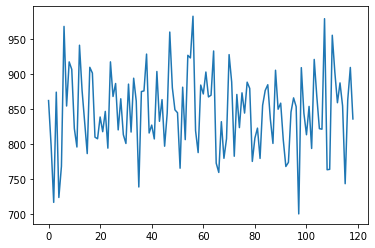

In [210]:
AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT
final = AIRI * rainfallforAIRI.std() + rainfallforAIRI.mean()
plt.plot(final)

In [211]:
print(rainfallforAIRI)

[ 889.3      722.       791.80005  860.8      750.3      716.4
  884.89996  777.49994  897.       889.3      934.89996  736.30005
  805.80005  784.4      898.       780.6      950.6     1004.2
  650.8      884.5      719.       865.8      869.       823.
  862.6      803.60004  902.6      853.       767.7      821.1
  804.4      877.       803.4      975.8      913.39996  843.5
  908.19995  841.89996  908.19995  789.4      853.1      728.30005
  957.69995  868.2001   920.3      910.80005  903.60004  945.3
  873.89996  903.69995  876.9      738.8      792.9      922.89996
  885.30005  930.       983.2      788.5      889.3      944.1
  839.7     1020.2      809.8      857.9      922.5      709.39996
  739.9      860.1      754.6      831.       939.8      886.8
  652.8      913.4      748.       962.7      856.80005  883.2
  909.30005  707.7      882.8      852.19995  735.4      955.60004
  836.7      759.8      743.       697.1      961.5    ]


In [244]:
EPTdata = []
CPTdata = []
PSHdata = []
NATdata = []
rainfalldata = []
rainfalldataincorrect = []


for x in range (119):
    EPTdata.append(float(EPT[x]))
for x in range (119):
    CPTdata.append(float(CPT[x]))
for x in range (119):
    PSHdata.append(float(PSH[x]))
for x in range (119):
    NATdata.append(float(NAT[x]))

#X = [EPTdata, CPTdata, PSHdata, NATdata]

#using new rainfall dataset
for x in range (89):
    rainfalldataincorrect.append(float(rainfall[x+87]))

for y in range(119):
    rainfalldata.append(rainfallforAIRIfull[y+26])
        
#Y = [rainfalldata]

In [245]:
#Ydata = ((rainfalldata - np.mean(rainfalldata))/np.std(rainfalldata)) 
Ydatadetrend = signal.detrend(rainfalldata)
Ydata = (Ydatadetrend - np.mean(Ydatadetrend))/np.std(Ydatadetrend)
Xtrain = []
for x in range(119):
    Xtrain.append(float(EPTdata[x]))
    Xtrain.append(float(CPTdata[x]))
    Xtrain.append(float(PSHdata[x]))
    Xtrain.append(float(NATdata[x]))
Xtrainarray = np.array([Xtrain])

Xdata = Xtrainarray.reshape(-1,4)
#X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=0)
#regressor = LinearRegression()
#regressor.fit(X_train, Y_train)

In [246]:
#cross validation loops
EPTregressiondata = []
CPTregressiondata = []
PSHregressiondata = []
NATregressiondata = []


for x in range (119):
    Xtrain = []
    Ytrain = []
    Ytest = []
    Xtest = []
    for y in range (119):
        Xtest.append(Xdata[x])
        Ytest.append(Ydata[x])
        if (y != x):
            Xtrain.append(Xdata[y])
            Ytrain.append(Ydata[y])
    regressor = LinearRegression()
    regressor.fit(Xtrain, Ytrain)
    
    EPTregressiondata.append(regressor.coef_[0])
    CPTregressiondata.append(regressor.coef_[1])
    PSHregressiondata.append(regressor.coef_[2])
    NATregressiondata.append(regressor.coef_[3])


#X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.2)
'''
#ignore, was for testing purposes
Xtrain = []
Ytrain = []

for x in range (89):
    Xtrain.append(Xdata[x])
    Ytrain.append(Ydata[x])
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.2)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print(regressor.coef_)
'''
    
#EPTregressiondata.append(regressor.coef_[0])
#CPTregressiondata.append(regressor.coef_[1])
#PSHregressiondata.append(regressor.coef_[2])
#NATregressiondata.append(regressor.coef_[3])



'\n#ignore, was for testing purposes\nXtrain = []\nYtrain = []\n\nfor x in range (89):\n    Xtrain.append(Xdata[x])\n    Ytrain.append(Ydata[x])\nX_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.2)\nregressor = LinearRegression()\nregressor.fit(X_train, Y_train)\n\nprint(regressor.coef_)\n'

In [247]:
EPTregressionstd = np.std(EPTregressiondata)
CPTregressionstd = np.std(CPTregressiondata)
PSHregressionstd = np.std(PSHregressiondata)
NATregressionstd = np.std(NATregressiondata)

EPTregressionmean = np.mean(EPTregressiondata)
CPTregressionmean = np.mean(CPTregressiondata)
PSHregressionmean = np.mean(PSHregressiondata)
NATregressionmean = np.mean(NATregressiondata)

EPTregression = []
CPTregression = []
PSHregression = []
NATregression = []

EPTregression.append(EPTregressionstd)
EPTregression.append(EPTregressionmean)

CPTregression.append(CPTregressionstd)
CPTregression.append(CPTregressionmean)

PSHregression.append(PSHregressionstd)
PSHregression.append(PSHregressionmean)

NATregression.append(NATregressionstd)
NATregression.append(NATregressionmean)

#sqrt of n 1.96

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT', EPTregression), ('CPT', CPTregression), ('PSH', PSHregression), ('NAT', NATregression)], orient='index', columns=['Standard Deviation', 'Mean'])

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean
EPT,0.010917,0.171649
CPT,0.008190,-0.085786
PSH,0.010337,-0.091756
NAT,0.008697,-0.123180


In [236]:
#AIRI = 0.47*EPT + 0.19*CPT + 0.23*PSH - 0.24*NAT

EPTconfidence95 = EPTregressionstd / np.sqrt(119)*1.96
print("EPT", EPTconfidence95)
CPTconfidence95 = CPTregressionstd / np.sqrt(119)*1.96
print("CPT", CPTconfidence95)
PSHconfidence95 = PSHregressionstd / np.sqrt(119)*1.96
print("PSH", PSHconfidence95)
NATconfidence95 = NATregressionstd / np.sqrt(119)*1.96
print("NAT", NATconfidence95)

EPT 0.0019572793049526444
CPT 0.0014732801843730786
PSH 0.0018501506675495892
NAT 0.0015632889755499593


In [237]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

lmodel = LinearRegression()

clf = SVC(kernel='linear', C=1) #isn't working
cv_results = cross_validate(lmodel, Xdata, Ydata, cv=119, return_estimator=True) 

EPTcoef = []
CPTcoef = []
PSHcoef = []
NATcoef = []

for model in cv_results['estimator']:
    EPTcoef.append(model.coef_[0])
    CPTcoef.append(model.coef_[1])
    PSHcoef.append(model.coef_[2])
    NATcoef.append(model.coef_[3])
    print(model.coef_)
    
    

[ 0.169435   -0.09089394 -0.08458159 -0.11777141]
[ 0.17279773 -0.07923703 -0.09301505 -0.12485744]
[ 0.12358049 -0.0835197  -0.08452778 -0.08608236]
[ 0.16829274 -0.0865937  -0.09570507 -0.13208794]
[ 0.14473061 -0.10063072 -0.0783879  -0.1118181 ]
[ 0.166726   -0.09865132 -0.09320285 -0.12710536]
[ 0.17274982 -0.0857606  -0.09152879 -0.12320392]
[ 0.17115413 -0.07405606 -0.09895334 -0.12689923]
[ 0.17967507 -0.08264826 -0.07593258 -0.11655743]
[ 0.17558917 -0.09382054 -0.10062012 -0.12227718]
[ 0.17373184 -0.11452765 -0.07883701 -0.11838594]
[ 0.19657391 -0.08335218 -0.11253846 -0.12921189]
[ 0.16646892 -0.08549811 -0.09646549 -0.12403144]
[ 0.16826583 -0.10407852 -0.08664058 -0.12857943]
[ 0.17029295 -0.08951129 -0.08381213 -0.10690432]
[ 0.17147396 -0.08564586 -0.10281542 -0.12842907]
[ 0.17529642 -0.08782351 -0.08593879 -0.12988011]
[ 0.18845275 -0.10378025 -0.11526356 -0.12512746]
[ 0.16685704 -0.08376298 -0.09002712 -0.11976751]
[ 0.17948504 -0.08253348 -0.0966557  -0.13702717]


/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/global/home/users/medhap02/.conda/e

In [238]:
EPTregressionstd = np.std(EPTcoef)
CPTregressionstd = np.std(CPTcoef)
PSHregressionstd = np.std(PSHcoef)
NATregressionstd = np.std(NATcoef)

EPTregressionmean = np.mean(EPTcoef)
CPTregressionmean = np.mean(CPTcoef)
PSHregressionmean = np.mean(PSHcoef)
NATregressionmean = np.mean(NATcoef)

EPTmodel = []
CPTmodel = []
PSHmodel = []
NATmodel = []

EPTmodel.append(EPTregressionstd)
EPTmodel.append(EPTregressionmean)

CPTmodel.append(CPTregressionstd)
CPTmodel.append(CPTregressionmean)

PSHmodel.append(PSHregressionstd)
PSHmodel.append(PSHregressionmean)

NATmodel.append(NATregressionstd)
NATmodel.append(NATregressionmean)

#sqrt of n 1.96

#mean might not mean anything since data has been standardized
pd.DataFrame.from_items([('EPT', EPTmodel), ('CPT', CPTmodel), ('PSH', PSHmodel), ('NAT', NATmodel)], orient='index', columns=['Standard Deviation', 'Mean'])

/global/home/users/medhap02/.conda/envs/xarrayenv2/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.


,Standard Deviation,Mean
EPT,0.010894,0.171631
CPT,0.008200,-0.085777
PSH,0.010297,-0.091747
NAT,0.008701,-0.123168


In [239]:
EPTconfidence95 = EPTregressionstd / np.sqrt(119)*1.96
print("EPT", EPTconfidence95)
CPTconfidence95 = CPTregressionstd / np.sqrt(119)*1.96
print("CPT", CPTconfidence95)
PSHconfidence95 = PSHregressionstd / np.sqrt(119)*1.96
print("PSH", PSHconfidence95)
NATconfidence95 = NATregressionstd / np.sqrt(119)*1.96
print("NAT", NATconfidence95)

EPT 0.0019572793049526444
CPT 0.0014732801843730786
PSH 0.0018501506675495892
NAT 0.0015632889755499593


In [240]:
AIRI2 = 0.171496*EPT - 0.085912*CPT - 0.093845*PSH - 0.123344*NAT
final2 = AIRI2 * rainfallforAIRIfull.std() + rainfallforAIRIfull.mean()

In [208]:
predictions = lm.predict(X_test)
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', model.score(X_test, Y_test))

#doesn't make sense though, should run predictions against whole dataset
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

NameError: name 'lm' is not defined

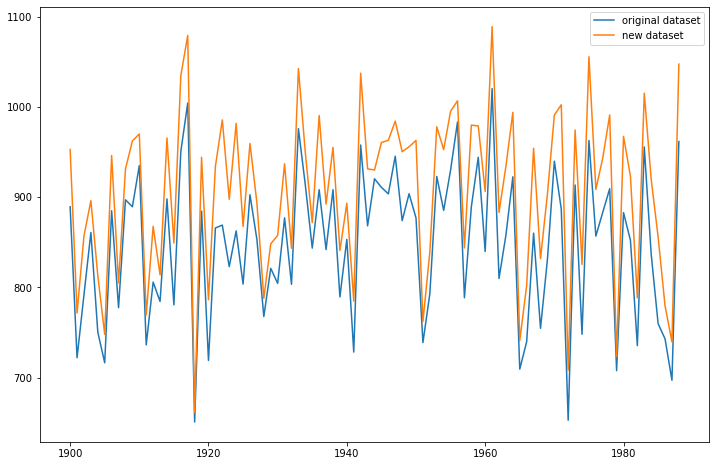

In [209]:
trainingyears = []
for x in range(89):
    trainingyears.append(x+1900)

plt.figure(figsize=(12,8)) #label axis
plt.plot(trainingyears, rainfallforAIRI, label='original dataset')
plt.plot(trainingyears, rainfalldataincorrect, label='new dataset')
plt.legend()
#plt.plot(partial)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.2, random_state=0)
#regressor = LinearRegression()  
#regressor.fit(X_train, Y_train)

#coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
#coeff_df

In [ ]:
'''
#from linear regression
Ypredata = (rainfalldata - np.mean(rainfalldata))/np.std(rainfalldata)
Ydata = []
for x in range(89):
    Ydata.append(Ypredata[x])

Xtrain = []
for x in range(89):
    Xtrain.append(float(EPTdata[x]))
    Xtrain.append(float(CPTdata[x]))
    Xtrain.append(float(PSHdata[x]))
    Xtrain.append(float(NATdata[x]))
Xtrainarray = np.array([Xtrain])

Xdata = Xtrainarray.reshape(-1,4)
regressor = LinearRegression()
regressor.fit(Xdata, Ydata)

#pd.DataFrame.from_items([('Coefficients', regressor.coef_[0])], orient='index', columns=['EPT', 'CPT', 'PSH', 'NAT'])

EPTregressiondata = []
EPTregressiondata.append(regressor.coef_[0])
EPTregressiondata.append(regressor.intercept_)

CPTregressiondata = []
CPTregressiondata.append(regressor.coef_[1])
CPTregressiondata.append(regressor.intercept_)

PSHregressiondata = []
PSHregressiondata.append(regressor.coef_[2])
PSHregressiondata.append(regressor.intercept_)

NATregressiondata = []
NATregressiondata.append(regressor.coef_[3])
NATregressiondata.append(regressor.intercept_)

pd.DataFrame.from_items([('EPT', EPTregressiondata), ('CPT', CPTregressiondata), ('PSH', PSHregressiondata), ('NAT', NATregressiondata)], orient='index', columns=['Coefficient', 'Intercept'])
'''

In [ ]:
'''
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size=0.2)
#print(X_train.shape, Y_train.shape)
#print(X_test.shape, Y_test.shape)

lm = LinearRegression()
model = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)
print(model.coef_)
#print(predictions)
plt.scatter(Y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

print('Score:', model.score(X_test, Y_test))
'''

In [ ]:
'''
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(Xdata)


for train_index, test_index in loo.split(Xdata):
   #print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = Xdata[train_index], Xdata[test_index]
   Y_train, Y_test = Ydata[train_index], Ydata[test_index]
   #print(X_train, X_test, Y_train, Y_test)

'''

In [ ]:
'''
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, Xdata, Ydata, cv=6)
print('Cross-validated scores:', scores)

# Make cross validated predictions
predictions = cross_val_predict(model, Xdata, Ydata, cv=6)
plt.scatter(Ydata, predictions)

accuracy = metrics.r2_score(Ydata, predictions)
print('Cross-Predicted Accuracy:', accuracy)
'''

In [ ]:
'''#LEAVE ONE OUT

from timeit import default_timer as timer
start_LOO = timer()
# generate LOO predictions
LOO_predictions = cross_val_predict(lm, Xdata, Ydata, cv=(len(Xdata)))
end_LOO = timer()
LOO_time = (end_LOO - start_LOO)

# plot LOO predictions against actual
plot_LOO = seabornInstance.scatterplot(Ydata, LOO_predictions)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

LOO_score_start = timer()
# find the mean score from the LOO models using cross_val_score 
LOO_score = cross_val_score(lm, Xdata, Ydata, cv=(len(Xdata)), scoring='neg_mean_squared_error').mean()
print(LOO_score)
LOO_score_end = timer()
LOO_score_time = (LOO_score_end - LOO_score_start)

print("Leave One Out Cross Validation method took", LOO_time, 'seconds to generate a model and', LOO_score_time, 'seconds to generate a MSE of', LOO_score)
'''

In [ ]:
'''print('Mean Absolute Error:', metrics.mean_absolute_error(Ydata, LOO_predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(Ydata, LOO_predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Ydata, LOO_predictions)))

#standardized rainfall plot
seabornInstance.distplot((rainfalldata - np.mean(rainfalldata))/np.std(rainfalldata))
'''